# Part 1

## Extraction Function

In [170]:
# importing needed modules

import pandas
import numpy
import matplotlib.pyplot as plt
import csv

# define function that will take csv file and change it to a numpy array
# uses both the pandas module
# takes argument of the csv file in question

def numpydata_from_csv(csv_file):
    tmp_data = pandas.read_csv(csv_file, header =None) 
    data = tmp_data.to_numpy()
    return data

## Analysis Functions

In [171]:
# define functions that will take raw data output useful, post analysis information

# define a function that will output the percentage of a certain race that lives at least a half mile away
# from a supermarket
# the function takes inputs, in the order, the data, the column in the data that is the total number of a
# certain race, and the column in the data that is the total number of a race living at least 1/2 mile away
# from a supermarket

def race_half_mile_percent(input_data, total_number_column, past_half_mile_column):
    race_half_mile_total = numpy.sum(input_data[0:,past_half_mile_column])
    race_total = numpy.sum(input_data[0:,total_number_column])
    percentage = race_half_mile_total/race_total*100
    return percentage

# define a function that has similar functionality to the one above
# this function determines the percentage of a race that lives at least one mile away from a supermarket
# pass this function the column of the one mile away data instead of the 1/2 mile away data

def race_one_mile_percent(input_data, total_number_column, past_one_mile_column):
    race_one_mile_total = numpy.sum(input_data[0:,past_one_mile_column])
    race_total = numpy.sum(input_data[0:,total_number_column])
    percentage = race_one_mile_total/race_total*100
    return percentage

# define a function that has similar functionality to the one above
# this function determines the percentage of a race that lives at least ten miles away from a supermarket
# pass this function the column of the one mile away data instead of the one mile away data

def race_ten_mile_percent(input_data, total_number_column, past_ten_mile_column):
    race_ten_mile_total = numpy.sum(input_data[0:,past_ten_mile_column])
    race_total = numpy.sum(input_data[0:,total_number_column])
    percentage = race_ten_mile_total/race_total*100
    return percentage

## Visualization Function

In [172]:
# define function to plot data
# the function takes input of, in order, the race name, the race's half mile percentage, the race's one mile
# percentage, and the race's ten mile percentage
# these inputs can be easily generated using the analysis functions

def plot_race_percentage_versus_distance(name, half, one, ten):
    plt.plot([0.5, 1, 10],[half, one, ten])
    plt.axis([0, 12, 0, 100])
    plt.xlabel('Distance from Supermarket (Miles)')
    plt.ylabel('Percentage')
    plt.title('Percentage of %s Race Living at a Distance From Supermarket' % name)
    plt.show()
    return

## Using Functions to Extract, Analyze, and Visualize Data

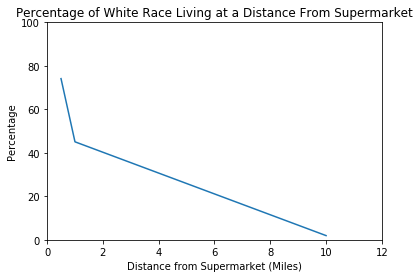

In [173]:
# declare a variable "data" that will use numpydata_from_csv and extract raw data so we can analyse it

data = numpydata_from_csv('food_access_data.csv')

# use analysis functions with proper inputs from raw data so that we have useful data to visualize

white_half_percent = race_half_mile_percent(data, 34, 5)
white_one_percent = race_one_mile_percent(data, 34, 15)
white_ten_percent = race_ten_mile_percent(data, 34, 25)

# use visualization function to plot data and inspect

plot_race_percentage_versus_distance('White', white_half_percent, white_one_percent, white_ten_percent)

# Part 2

In [176]:
# we use the open function to open our data csv and then use csv.DictReader to get an ordered dictionary
# we iterate our dictionary in order to find how many occurances we have of a given key having values assigned

with open('food_access_data.csv', mode = 'r', encoding = 'utf-8-sig') as csvfile:
    reader = csv.DictReader(csvfile)
    occurances = 0
    for row in reader:
        occurances = occurances + 1
    print("Assuming that the first row in our data will be a key for the entire column's values ")
    print('we have {} occurances of values to a key.\n'.format(occurances))
    print('This makes sense because we have {} rows, with the first row being keys '.format(occurances+1))
    print('and all the subsequent rows being values to the keys.\n')
        
# now we do some analysis using the DictReader function
# we use DictReader to make an ordered dictionary and now add up the values for a given key
# for our data, this will give us the total polled population of a race
# in this specific code, I have to use the key 1622 because the original csv does not have headings
# it goes straight into the data. The column that is headed by 1622 is the white population for each sample

with open('food_access_data.csv', mode = 'r', encoding = 'utf-8-sig') as csvfile:
    reader = csv.DictReader(csvfile)
    total_white = 1622
    for row in reader:
        total_white = total_white + int(row['1622'])
    print('The total white population in my data according to DictReader is {}.\n'.format(total_white))
    
# I will compare my results from my use DictReader with my use of numpy's built in functions

print("The total white population in my data according to numpy's sum function ")
print('is {:0.0f}.\n'.format(numpy.sum(data[0:,34])))

Assuming that the first row in our data will be a key for the entire column's values 
we have 72863 occurances of values to a key.

This makes sense because we have 72864 rows, with the first row being keys 
and all the subsequent rows being values to the keys.

The total white population in my data according to DictReader is 223553265.

The total white population in my data according to numpy's sum function 
is 223553265.



# Part 3

In [175]:
# declare a variable output_file and open a file with read and write capabilites

output_file = open('output_f1.txt','w+')

# now we write to the file the data that we got from extraction and analysis functions and from DictReader
# format the written content using the format() function

# the use of {} in the below line signals the place where the data from format() goes
# in our case we are filling {} with the total number of white people polled that we got from using DictReader

output_file.write('The total number of white people that are in my sample is {}.\n'.format(total_white))

# our use of {:0.2f} below is another, more detailed way of using the format() function
# the : tells format() that we will be specifing a format
# the 0 signals that we want to pad the number with a 0
# the .2 signals that we want 2 digits of precision past the decimal and to get rid of the rest
# the f signals that we want to display a fixed point number

output_file.write('The percentage of white people in my sample that live at least one half mile away from the supermarket is {:0.2f}%.\n'.format(white_half_percent))
output_file.write('The percentage of white people in my sample that live at least one mile away from the supermarket is {:0.2f}%.\n'.format(white_one_percent))
output_file.write('The percentage of white people in my sample that live at least ten miles away from the supermarket is {:0.2f}%.\n'.format(white_ten_percent))

# closing the file we wrote in

output_file.close()